In [210]:
#Create data set
import glob
import pandas as pd
import re
import spacy
from string import punctuation
translator = str.maketrans('','',punctuation) 
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))

numdocs = 200 #nuber of documents to be processed
path = '/home/tobias/Documents/RobotJudge/cases/' #path to the case files



cases = []
years = []
ids = []

nlp = spacy.load('en')
files = glob.glob(path + '*.txt')
i = 0


for file in files:
    if i > numdocs:
        break
    try:
        with open(file) as open_file:
            cases.append(open_file.read())
            years.append(re.findall(path + '(\d+)', file)[0])
            id = re.findall(path + '(\d+)_(\S)(\S)(\S)(\S)(\S)(\S)', file)[0]
            ids.append(''.join(id[1:7]))
            i += 1
    except:
            print("Error reading File")    
            
df  = pd.DataFrame({'caseid':ids,'text':cases, 'year':years})

def runSpacy(txt):
    return nlp(txt)

df['doc'] = df['text'].apply(runSpacy)




Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File
Error reading File


In [211]:
def normalize(doc): 
    tokens = []
    for sent in doc.sents:
        sent = str(sent)
        sent = sent.replace('\r', ' ').replace('\n', ' ')
        lower = sent.lower() # all lower case
        nopunc = lower.translate(translator) # remove punctuation
        words = nopunc.split() # split into tokens
        nostop = [w for w in words if w not in stoplist] # remove stopwords
        no_numbers = [w if not w.isdigit() else '#' for w in nostop] # normalize numbers
        stemmed = [stemmer.stem(w) for w in no_numbers] # stem each word
        for i in stemmed:
            if (not i == 'court') and (not i == 'v') and (not i == '#') and (not i == 'case') and (not i == 'state') and (not i == 'land'): #very obring words
                tokens.append(i)
    return tokens

df['cleanToken'] = df['doc'].apply(normalize)
df.head()

,caseid,text,year,doc,cleanToken
0,X21KR0,PER CURIAM.\nThe sole question in this case i...,1962,"( , PER, CURIAM, ., \n, The, sole, question, i...","[per, curiam, sole, question, whether, agenc, ..."
1,X2NJD6,"MYRON L. GORDON, District Judge.\nThis is an ...",1973,"( , MYRON, L., GORDON, ,, District, Judge, ., ...","[myron, l, gordon, district, judg, interlocuto..."
2,X40B69,"WILBUR , Circuit Judge.\nThese two petitions ...",1941,"( , WILBUR, ,, Circuit, Judge, ., \n, These, t...","[wilbur, circuit, judg, two, petit, review, de..."
3,X9VH38,"PER CURIAM.\nDefendant, convicted of selling ...",1965,"( , PER, CURIAM, ., \n, Defendant, ,, convicte...","[per, curiam, defend, convict, sell, marihuana..."
4,XABN4A,"GOLDBERG , Circuit Judge: The segregation of ...",1984,"( , GOLDBERG, ,, Circuit, Judge, :, The, segre...","[goldberg, circuit, judg, segreg, one, group, ..."


In [212]:
def findTriGrams(doc):
    trigram = []
    for i in range(0, len(doc) - 2):
        trigram.append(str(doc[i]) + " " + str(doc[i+1]) + " " + str(doc[i+2]))
                        
    return trigram

df['trigrams'] = df['cleanToken'].apply(findTriGrams)
df['trigrams']

0      [per curiam sole, curiam sole question, sole q...
1      [myron l gordon, l gordon district, gordon dis...
2      [wilbur circuit judg, circuit judg two, judg t...
3      [per curiam defend, curiam defend convict, def...
4      [goldberg circuit judg, circuit judg segreg, j...
5      [henley circuit judg, circuit judg neil, judg ...
6      [washington circuit judg, circuit judg concern...
7      [waller circuit judg, circuit judg unit, judg ...
8      [j skelli wright, skelli wright circuit, wrigh...
9      [per curiam judgment, curiam judgment number, ...
10     [hutcheson circuit judg, circuit judg brought,...
11     [john r gibson, r gibson circuit, gibson circu...
12     [albert bryan circuit, bryan circuit judg, cir...
13     [sanborn circuit judg, circuit judg appeal, ju...
14     [cornelia g kennedi, g kennedi circuit, kenned...
15     [per curiam singl, curiam singl issu, singl is...
16     [friend circuit judg, circuit judg princip, ju...
17     [cameron circuit judg, c

In [213]:
from collections import Counter
import statistics
termFrequencies = Counter()

for trigram in df['trigrams']:
    termFrequencies.update(trigram)

x = statistics.stdev(termFrequencies.values())



trigramsList = set(x[0] for x in termFrequencies.most_common()[:1000])

freqs = []
for tris in df['trigrams']:
    count = Counter(tris)
    for key in count:
        count[key] /= x
    freqs.append({key: count[key] for key in count if key in trigramsList})

    
features = pd.DataFrame(freqs)
features['caseid'] = df['caseid']

features.head()

,26b surplus properti,2d cir cert,441a tax reform,5th cir cert,6th cir cert,7th cir cert,81st cong 2d,9th cir cert,aba model code,accru salari employe,...,within one year,worker h h,world war ii,writ habea corpus,x x x,yam sang kwai,year renew term,york stock exchang,york unit us,caseid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X21KR0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X2NJD6
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X40B69
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X9VH38
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XABN4A


In [214]:
#Train new logistc regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

dfRev = pd.read_csv('/home/tobias/Documents/RobotJudge/case_reversed.csv')


join = features.merge(dfRev, on='caseid')

join.dropna(subset=['case_reversed'])

join.fillna(0, inplace=True)

logReg= LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(join.drop(columns=['case_reversed','caseid']), join['case_reversed'], test_size=0.25)

logReg.fit(X_train, y_train)
pred = logReg.predict(X_test)



print('Accuracy: ' + str(logReg.score(X_test, y_test)))
print('F1: '+ str(f1_score(y_test, pred)))
pred

Accuracy: 0.5510204081632653
F1: 0.6333333333333333


/home/tobias/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0])

In [216]:
#Proble 1
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

join1 = df.merge(dfRev, on='caseid')

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(join1['text'])

rev = join1['case_reversed']

rev1 = cross_val_predict(logReg, X, rev )

m = confusion_matrix(rev,rev1)
m

/home/tobias/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/tobias/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[  6,  71],
       [  2, 117]])

/home/tobias/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/tobias/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


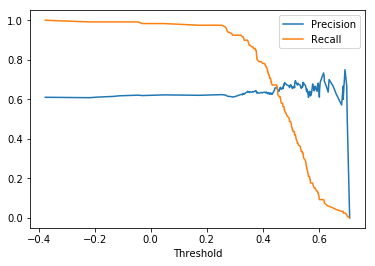

In [217]:
rev1 = cross_val_predict(logReg, X, rev,method='decision_function' )


from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(rev, rev1)

import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel('Threshold')
plt.legend()

Text(0, 0.5, 'True Positive Rate')

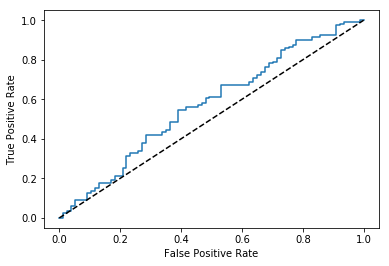

In [218]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(rev, rev1)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

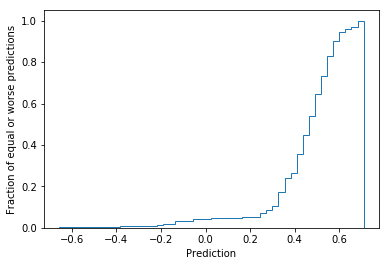

In [219]:
n, bins, patches = plt.hist(rev1, 50, density=True, histtype='step',
                           cumulative=True)

plt.xlabel('Prediction')
plt.ylabel('Fraction of equal or worse predictions')

plt.show()

In [220]:
#Problem 2
from sklearn.preprocessing import StandardScaler

cites = pd.read_csv('/home/tobias/Documents/RobotJudge/case_metadata.csv')[['caseid', 'log_cites']]
cites.fillna(0, inplace=True)


featuresC = features.merge(cites, on='caseid')

featuresCS = featuresC.drop(columns=['caseid', 'log_cites'])
sparse_scaler = StandardScaler(with_mean=False)
featuresS = sparse_scaler.fit_transform(featuresCS)

featuresS

/home/tobias/miniconda3/lib/python3.6/site-packages/sklearn/utils/extmath.py:776: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/tobias/miniconda3/lib/python3.6/site-packages/sklearn/utils/extmath.py:781: RuntimeWarning: Degrees of freedom <= 0 for slice.
  new_unnormalized_variance = np.nanvar(X, axis=0) * new_sample_count


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

/home/tobias/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


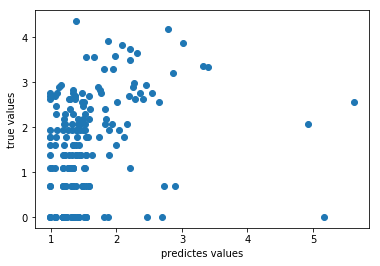

In [221]:
from sklearn.linear_model import ElasticNet
enet_reg = ElasticNet(alpha=.1, l1_ratio=.5)
enet_reg.fit(featuresCS.fillna(0), featuresC['log_cites'])
x = cross_val_predict(enet_reg, featuresCS.fillna(0), featuresC['log_cites'])
plt.scatter(x,featuresC['log_cites'])
plt.xlabel('predictes values')
plt.ylabel('true values')
plt.show()

In [222]:
#Problem 3
meta = pd.read_csv('/home/tobias/Documents/RobotJudge/case_metadata.csv')

meta.groupby('judge_id')['log_cites'].mean()
meta.head()

,caseid,case_reversed,judge_id,year,log_cites
0,X3JGGO,0,1653.0,1925.0,1.098612
1,X3OH3J,0,1034.0,1924.0,1.609438
2,X3U0KO,0,2303.0,1925.0,1.791759
3,X53HAD,0,1764.0,1924.0,NaN
4,X9VC5V,0,493.0,1925.0,NaN


In [223]:
y = meta['case_reversed']
x = meta['log_cites']
x.fillna(0, inplace=True)
z = meta.groupby('judge_id')['log_cites'].mean()
z.fillna(0, inplace=True)

merge = meta.merge(z, on='judge_id', how='outer')
merge.fillna(0, inplace=True)
merge.columns = ['caseid', 'case_reversed', 'judge_id', 'year', 'log_cites', 'avg cites judge']
merge.head()

,caseid,case_reversed,judge_id,year,log_cites,avg cites judge
0,X3JGGO,0,1653.0,1925.0,1.098612,0.895880
1,X3H31V,1,1653.0,1931.0,0.693147,0.895880
2,X3OH3J,0,1034.0,1924.0,1.609438,1.298239
3,X3DTQO,0,1034.0,1927.0,1.098612,1.298239
4,X3CESF,1,1034.0,1926.0,2.484907,1.298239


In [224]:
#Problem 4

doc_clean = df['cleanToken']

from random import shuffle
shuffle(doc_clean)

# creating the term dictionary
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)

# creating the document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# train LDA with 10 topics and print
from gensim.models.ldamodel import LdaModel
lda = LdaModel(doc_term_matrix, num_topics=5, 
               id2word = dictionary, passes=3)
lda.show_topics(formatted=False)

[(0,
  [('us', 0.0062994463),
   ('act', 0.0058331117),
   ('unit', 0.0057406803),
   ('commiss', 0.005425944),
   ('sct', 0.0053615407),
   ('compani', 0.0052147247),
   ('upon', 0.0049997945),
   ('law', 0.004824067),
   ('tax', 0.004506101),
   ('order', 0.0039176825)]),
 (1,
  [('act', 0.008345724),
   ('us', 0.0070036175),
   ('claim', 0.006891664),
   ('district', 0.006095214),
   ('unit', 0.005910521),
   ('right', 0.0058705024),
   ('sct', 0.0056455596),
   ('law', 0.0052427826),
   ('order', 0.0051119365),
   ('section', 0.0046503707)]),
 (2,
  [('sct', 0.008499822),
   ('us', 0.0077052647),
   ('unit', 0.0065890937),
   ('parti', 0.006328537),
   ('candid', 0.005497968),
   ('act', 0.004737818),
   ('interest', 0.0047334223),
   ('law', 0.004331251),
   ('see', 0.0040789694),
   ('would', 0.004039968)]),
 (3,
  [('us', 0.008267319),
   ('sct', 0.007708385),
   ('district', 0.0058944356),
   ('f2d', 0.0058582234),
   ('unit', 0.005030326),
   ('law', 0.00481422),
   ('feder', 

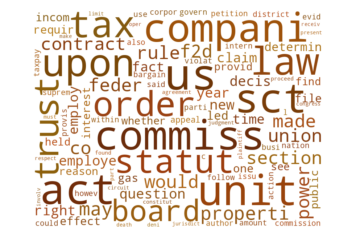

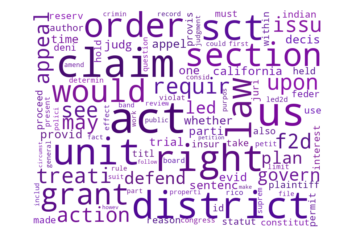

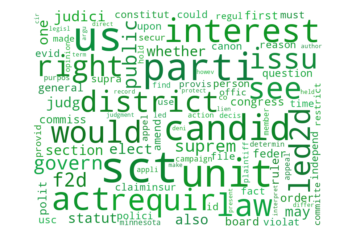

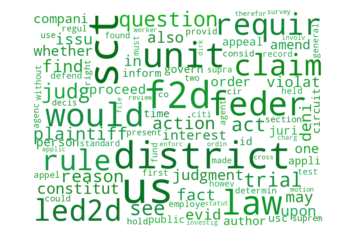

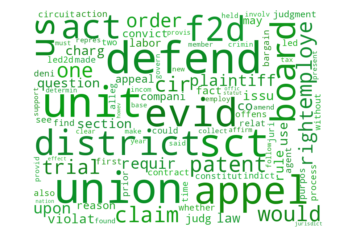

In [225]:
#after removing some words from the list, 5 topics seemed to give the best results
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from numpy.random import randint

for i,weights in lda.show_topics(num_topics=-1,
                                 num_words=100,
                                 formatted=False):
    
    #logweights = [w[0], np.log(w[1]) for w in weights]
    maincol = randint(0,360)
    def colorfunc(word=None, font_size=None, 
                  position=None, orientation=None, 
                  font_path=None, random_state=None):   
        color = randint(maincol-10, maincol+10)
        if color < 0:
            color = 360 + color
        return "hsl(%d, %d%%, %d%%)" % (color,randint(65, 75)+font_size / 7, randint(35, 45)-font_size / 10)   

    
    wordcloud = WordCloud(background_color="white", 
                          ranks_only=False, 
                          max_font_size=120,
                          color_func=colorfunc,
                          height=600,width=800).generate_from_frequencies(dict(weights))

    plt.clf()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [226]:
#Problem 5
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

model = Sequential() # create a sequential model
model.add(Dense(150, # output neurons in layer       
          input_dim=1000,# number of inputs
          kernel_regularizer=regularizers.l2(0.01),
          activation='relu')) # activation function
model.add(Dense(1, activation='sigmoid')) # output layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 150)               150150    
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 151       
Total params: 150,301
Trainable params: 150,301
Non-trainable params: 0
_________________________________________________________________


In [227]:
model.compile(loss='binary_crossentropy', # cost function
              optimizer='adam', # use adam as the optimizer
              metrics=['accuracy']) # compute accuracy, for scoring

info = model.fit(join.drop(columns=['case_reversed','caseid']), join['case_reversed'], epochs=5,
                      validation_split=.2)

Train on 156 samples, validate on 40 samples
Epoch 1/5
156/156 [==============================] - 1s 4ms/step - loss: 3.1253 - acc: 0.5705 - val_loss: 2.8792 - val_acc: 0.5750
Epoch 2/5
156/156 [==============================] - 0s 210us/step - loss: 2.6421 - acc: 0.7436 - val_loss: 2.5356 - val_acc: 0.5750
Epoch 3/5
156/156 [==============================] - 0s 261us/step - loss: 2.2536 - acc: 0.8013 - val_loss: 2.2353 - val_acc: 0.6000
Epoch 4/5
156/156 [==============================] - 0s 340us/step - loss: 1.9295 - acc: 0.8205 - val_loss: 1.9770 - val_acc: 0.5750
Epoch 5/5
156/156 [==============================] - 0s 423us/step - loss: 1.6569 - acc: 0.8526 - val_loss: 1.7594 - val_acc: 0.5750


In [228]:
print('Accuracy of Logistic Regression: ' + str(logReg.score(X_test, y_test)))
print('Accuracy of Model: ' + str(info.history['acc'][4]))

Accuracy of Logistic Regression: 0.5510204081632653
Accuracy of Model: 0.8525640979791299


In [ ]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model1 = Sequential() # create a sequential model
model1.add(Dense(150, # output neurons in layer       
          input_dim=1000,# number of inputs
          activation='relu')) # activation function
model1.add(Dense(150, input_dim = 150, activation='relu')) # hidden layer
model1.add(Dense(150, input_dim = 150, activation='relu')) # hidden layer
model1.add(BatchNormalization())

model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid')) # output layer
model1.summary()

In [232]:
model1.compile(loss='binary_crossentropy', # cost function
              optimizer='adam', # use adam as the optimizer
              metrics=['accuracy']) # compute accuracy, for scoring

info = model1.fit(join.drop(columns=['case_reversed','caseid']), join['case_reversed'], epochs=5,
                      validation_split=.2)

Train on 156 samples, validate on 40 samples
Epoch 1/5
156/156 [==============================] - 1s 8ms/step - loss: 0.9337 - acc: 0.5833 - val_loss: 0.7362 - val_acc: 0.4750
Epoch 2/5
156/156 [==============================] - 0s 266us/step - loss: 0.5371 - acc: 0.7628 - val_loss: 0.7032 - val_acc: 0.5750
Epoch 3/5
156/156 [==============================] - 0s 335us/step - loss: 0.5953 - acc: 0.7372 - val_loss: 0.7076 - val_acc: 0.6250
Epoch 4/5
156/156 [==============================] - 0s 280us/step - loss: 0.4271 - acc: 0.7949 - val_loss: 0.7035 - val_acc: 0.5750
Epoch 5/5
156/156 [==============================] - 0s 400us/step - loss: 0.3715 - acc: 0.8462 - val_loss: 0.6935 - val_acc: 0.5500
